# 15 Minute Series: Analysis of San Diego
---

*Cara Higashi, Robert Lopez, Joseph Sy, Giovanni Ramos Gutierrez*

## Spatial Analysis
---

### City of San Diego Boundary

In [1]:
import geopandas as gpd
import warnings

warnings.simplefilter('ignore')

In [2]:
sdBoundary = gpd.read_file('./data/cities/san-diego/csd.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [3]:
boundary = sdBoundary[['geometry']]
boundary.head()

,geometry
0,"POLYGON ((-117.19471 32.75301, -117.19413 32.7..."
1,"POLYGON ((-117.17797 32.75765, -117.17706 32.7..."
2,"POLYGON ((-117.18383 32.74608, -117.18376 32.7..."
3,"POLYGON ((-117.16840 32.74897, -117.16768 32.7..."
4,"POLYGON ((-117.16400 32.74132, -117.16400 32.7..."


In [4]:
import os
import pandana as pdna

file_path = './networks/41740.h5'

if not os.path.exists(file_path):
    import quilt3 as q3
    b = q3.Bucket("s3://spatial-ucr")
    b.fetch("osm/metro_networks_8k/41740.h5", file_path)
sd_network = pdna.Network.from_hdf5(file_path)

Generating contraction hierarchies with 32 threads.
Setting CH node vector of size 332554
Setting CH edge vector of size 522484
Range graph removed 143094 edges of 1044968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


### SD Schools Isochrones

In [5]:
sdSchools = gpd.read_file('./data/schools/spatial-join/sdsJoin.shp')

In [6]:
from geosnap.analyze import isochrones_from_gdf

~~~
school_iso = isochrones_from_gdf(sdSchools, threshold=1600, network=sd_network)

school_iso.dissolve()

school_iso.to_file('./data/schools/Isochrones/isochrone.geojson')
~~~

In [7]:
sdsIso = gpd.read_file('./data/schools/Isochrones/isochrone.geojson')

<Axes: >

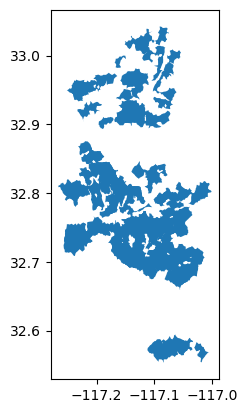

In [8]:
sdsIso.plot()

In [9]:
sdsIso['school_service'] = 1

In [10]:
sdsIso.head()

,origin,distance,geometry,school_service
0,286,1600,"POLYGON ((-117.18364 32.76623, -117.18372 32.7...",1
1,1,1600,"POLYGON ((-117.10087 32.71813, -117.09850 32.7...",1
2,2,1600,"POLYGON ((-117.12695 32.76514, -117.12728 32.7...",1
3,3,1600,"POLYGON ((-117.14192 32.78467, -117.14288 32.7...",1
4,23,1600,"POLYGON ((-117.21140 32.73516, -117.21148 32.7...",1


In [11]:
import matplotlib.pyplot as plt

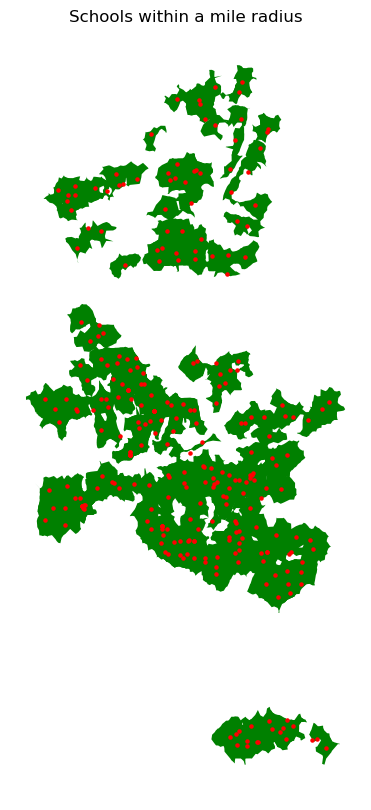

In [12]:
f, ax = plt.subplots(figsize=(12, 10))

sdsIso.plot(color='green', ax=ax)

sdSchools.plot(ax=ax, color='red', markersize=5)

plt.title('Schools within a mile radius')

ax.axis('off')

plt.show()

### SD Health Care Facilities

In [13]:
sdHealth = gpd.read_file('./data/hospitals/sdHosp/sdHospitals.shp')

~~~
hospital_iso = isochrones_from_gdf(sdHealth, threshold=1600, network=sd_network)

hospital_iso.dissolve()

hospital_iso.to_file('./data/hospitals/Isochrones/isochrone.geojson')
~~~

In [14]:
sdhIso = gpd.read_file('./data/hospitals/Isochrones/isochrone.geojson')

<Axes: >

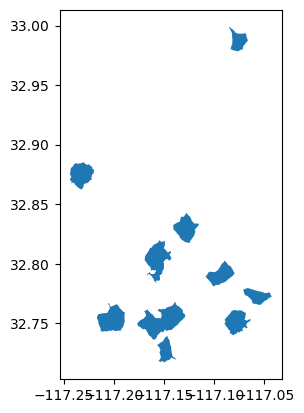

In [15]:
sdhIso.plot()

In [16]:
sdhIso['health_service'] = 1

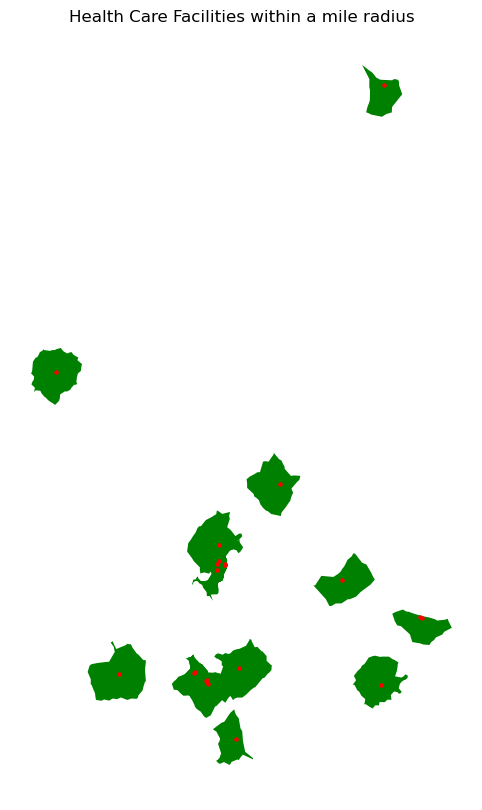

In [17]:
f, ax = plt.subplots(figsize=(12, 10))

sdhIso.plot(color='green', ax=ax)

sdHealth.plot(ax=ax, color='red', markersize=5)

plt.title('Health Care Facilities within a mile radius')

ax.axis('off')

plt.show()

In [18]:
intersection_result1 = gpd.overlay(sdhIso, sdsIso, how='intersection').reset_index().drop(['index', 'origin_1', 'origin_2'], axis=1)

In [19]:
from functions.rn_col import rename_column

rename_column(intersection_result1, old='distance_1', new='distance_hospital')
rename_column(intersection_result1, old='distance_2', new='distance_school')

In [20]:
intersection_result1.head()

,distance_hospital,health_service,distance_school,school_service,geometry
0,1600,1,1600,1,"POLYGON ((-117.15202 32.79302, -117.15223 32.7..."
1,1600,1,1600,1,"POLYGON ((-117.15202 32.79302, -117.15223 32.7..."
2,1600,1,1600,1,"POLYGON ((-117.15776 32.79667, -117.15885 32.7..."
3,1600,1,1600,1,"POLYGON ((-117.15768 32.79424, -117.16045 32.7..."
4,1600,1,1600,1,"MULTIPOLYGON (((-117.15202 32.79302, -117.1522..."


In [21]:
# service_union = gpd.overlay(sdhIso, sdsIso, how='union').drop(['origin_1', 'origin_2'], axis=1)
# service_union.dissolve()

In [22]:
# from functions.rn_col import rename_column

# rename_column(service_union, old='distance_1', new='distance_hospital')
# rename_column(service_union, old='distance_2', new='distance_school')

# service_union.head()

In [23]:
# service_union = gpd.overlay(service_union, boundary, how='union')

In [24]:
# service_union.head()

### SD Bus Stop Isochrones

In [25]:
busStops = gpd.read_file('./data/sd_transit/spatial-joins/busJoin.shp')

~~~
transit_iso = isochrones_from_gdf(busStops, threshold=1600, network=sd_network)

transit_iso.dissolve()

transit_iso.to_file('./data/sd_transit/Isochrones/isochrone.geojson')
~~~

In [26]:
sdbIso = gpd.read_file('./data/sd_transit/Isochrones/isochrone.geojson')

<Axes: >

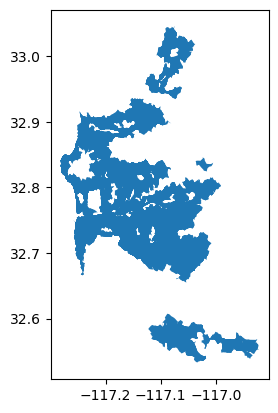

In [27]:
sdbIso.plot()

In [28]:
sdbIso['transit_service'] = 1

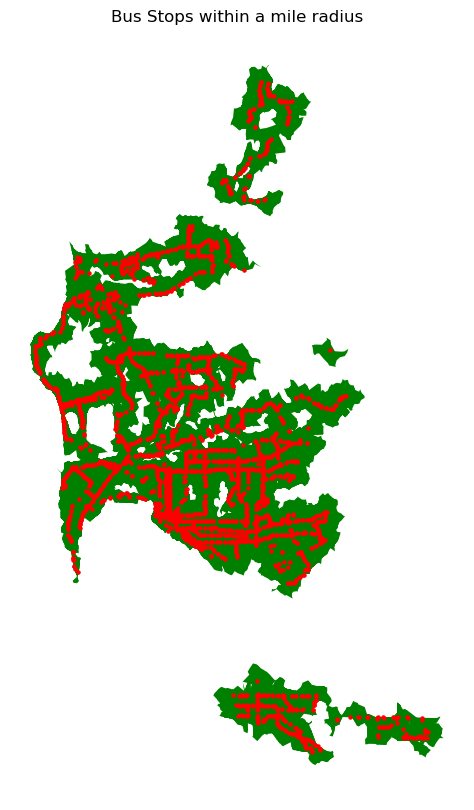

In [29]:
f, ax = plt.subplots(figsize=(12, 10))

sdbIso.plot(color='green', ax=ax)

busStops.plot(ax=ax, color='red', markersize=5)

plt.title('Bus Stops within a mile radius')

ax.axis('off')

plt.show()

In [30]:
rename_column(sdbIso, old='distance', new='distance_transit')

intersection_result2 = gpd.overlay(sdbIso, intersection_result1 , 
                                   how='intersection').reset_index().drop(['origin', 'index'], axis=1)

In [31]:
intersection_result2.head()

,distance_transit,transit_service,distance_hospital,health_service,distance_school,school_service,geometry
0,1600,1,1600,1,1600,1,"POLYGON ((-117.15283 32.72817, -117.15280 32.7..."
1,1600,1,1600,1,1600,1,"POLYGON ((-117.15332 32.72866, -117.15228 32.7..."
2,1600,1,1600,1,1600,1,"POLYGON ((-117.15292 32.72807, -117.15283 32.7..."
3,1600,1,1600,1,1600,1,"POLYGON ((-117.15332 32.72866, -117.15309 32.7..."
4,1600,1,1600,1,1600,1,"POLYGON ((-117.15159 32.72763, -117.15155 32.7..."


In [32]:
# service_union = gpd.overlay(intersection_result1, sdbIso, how='union').drop(['origin'], axis=1)
# service_union.dissolve()

In [33]:
# service_union = gpd.overlay(service_union, boundary, how='union')

In [34]:
# service_union.head()

### SD Grocery Store Isochrones

In [35]:
sdGrocery= gpd.read_file('./data/sd_grocery/spatial-joins/groceryStores.shp')

~~~
grocery_iso = isochrones_from_gdf(sdGrocery, threshold=1600, network=sd_network)

grocery_iso.dissolve()

grocery_iso.to_file('./data/sd_grocery/Isochrones/isochrones.geojson')
~~~

In [36]:
sdgIso = gpd.read_file('./data/sd_grocery/Isochrones/isochrones.geojson')

<Axes: >

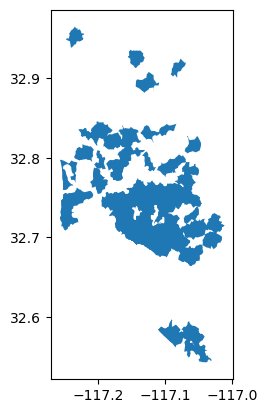

In [37]:
sdgIso.plot()

In [38]:
sdgIso['grocery_service'] = 1

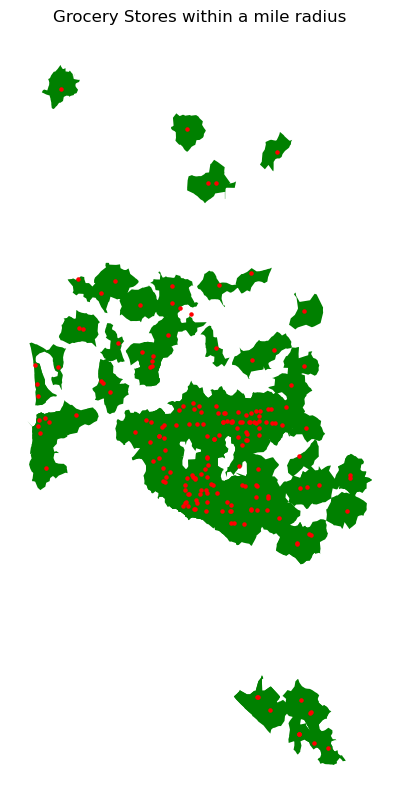

In [39]:
f, ax = plt.subplots(figsize=(12, 10))

sdgIso.plot(color='green', ax=ax)

sdGrocery.plot(ax=ax, color='red', markersize=5)

plt.title('Grocery Stores within a mile radius')

ax.axis('off')

plt.show()

In [40]:
rename_column(sdgIso, old='distance', new='distance_grocery')    

intersection_result3 = gpd.overlay(sdgIso, 
                                   intersection_result2, 
                                   how='intersection').reset_index().drop(['origin', 'index'], axis=1)

In [41]:
intersection_result3.head()

,distance_grocery,grocery_service,distance_transit,transit_service,distance_hospital,health_service,distance_school,school_service,geometry
0,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.21139 32.75840, -117.21090 32.7..."
1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19684 32.76424, -117.19789 32.7..."
2,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19602 32.76319, -117.19784 32.7..."
3,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19243 32.76004, -117.19371 32.7..."
4,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19536 32.74565, -117.19418 32.7..."


In [42]:
# service_union = gpd.overlay(intersection_result2, sdgIso, how='union').drop(['origin'])
# service_union.dissolve()

In [43]:
# service_union = gpd.overlay(service_union, boundary, how='union')

In [44]:
# service_union.head()

### SD Parks Isochrones

In [45]:
sdParks = gpd.read_file('./data/sd_parks/spatial-joins/parksJoins.shp')

<Axes: >

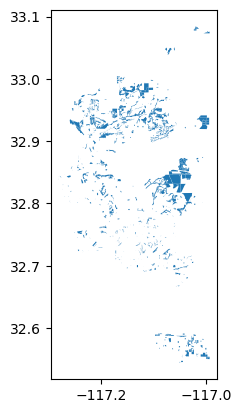

In [46]:
sdParks.plot()

In [47]:
def sample_boundary_points(polygon, num_points=3):
    
    return [polygon.boundary.interpolate(i / num_points, normalized=True) for i in range(num_points)]


boundary_points = [pt for polygon in sdParks.geometry for pt in sample_boundary_points(polygon)]

parkPoints = gpd.GeoDataFrame(geometry=boundary_points, crs=sdParks.crs)

<Axes: >

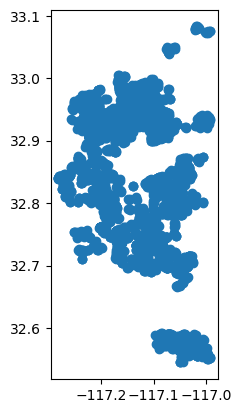

In [48]:
parkPoints.plot()

~~~
parks_isochrones = isochrones_from_gdf(parkPoints, threshold=1600, network=sd_network)

parks_isochrones.dissolve()

parks_isochrones.to_file('./data/sd_parks_iso/s22.shp')
~~~

In [49]:
sdParks = gpd.read_file('./data/sd_parks_iso/s22.shp')

In [50]:
sdParks['park_service'] = 1

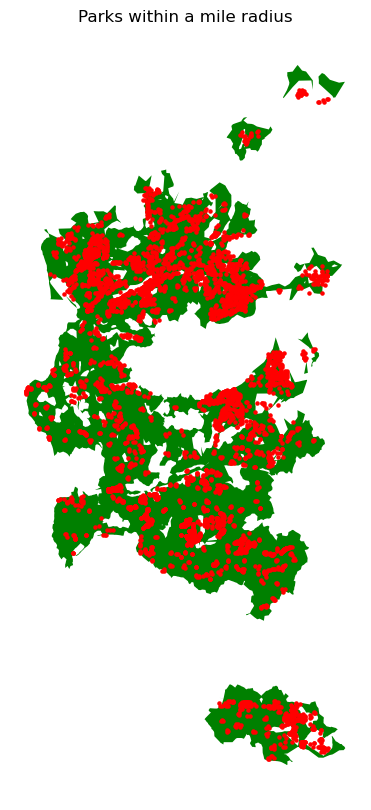

In [51]:
f, ax = plt.subplots(figsize=(12, 10))

sdParks.plot(color='green', ax=ax)

parkPoints.plot(ax=ax, color='red', markersize=5)

plt.title('Parks within a mile radius')

ax.axis('off')

plt.show()

In [52]:
rename_column(sdParks, old='distance', new='distance_park')

intersection_result4 = gpd.overlay(sdParks, intersection_result3, how='intersection')

In [53]:
intersection_result4.head()

,distance_park,park_service,distance_grocery,grocery_service,distance_transit,transit_service,distance_hospital,health_service,distance_school,school_service,geometry
0,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.21229 32.75745, -117.21181 32.7..."
1,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19789 32.76364, -117.19801 32.7..."
2,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19784 32.76107, -117.19797 32.7..."
3,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19371 32.75928, -117.19481 32.7..."
4,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19418 32.74871, -117.19429 32.7..."


In [54]:
# service_union = gpd.overlay(intersection_result3, sdParks, how='union')
# service_union.dissolve()

### SD Places of Worship Isochrones

In [55]:
sdPow = gpd.read_file('./data/sd_worship/spatial-joins/sdPow.geojson')

~~~
pow_iso = isochrones_from_gdf(csdri, threshold=1600, network=sd_network)

pow_iso.dissolve()

pow_iso.to_file('./data/sd_worship/Isochrones/riid.shp')
~~~

In [56]:
powIso = gpd.read_file('./data/sd_worship/Isochrones/riid.shp')

In [57]:
powIso['worship_service'] = 1

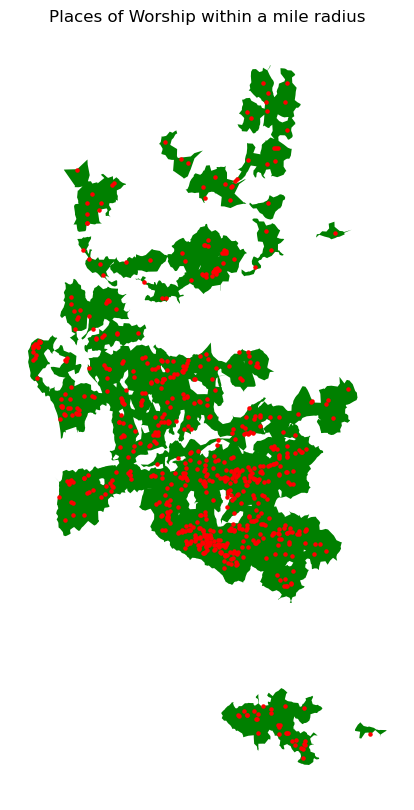

In [58]:
f, ax = plt.subplots(figsize=(12, 10))

powIso.plot(color='green', ax=ax)

sdPow.plot(ax=ax, color='red', markersize=5)

plt.title('Places of Worship within a mile radius')

ax.axis('off')

plt.show()

In [59]:
rename_column(powIso, old='distance', new='distance_worship')

intersection_result5 = gpd.overlay(powIso, intersection_result4, how='intersection')

In [60]:
intersection_result5.head()

,distance_worship,worship_service,distance_park,park_service,distance_grocery,grocery_service,distance_transit,transit_service,distance_hospital,health_service,distance_school,school_service,geometry
0,1600,1,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.21139 32.75840, -117.21090 32.7..."
1,1600,1,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19801 32.76364, -117.19847 32.7..."
2,1600,1,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.20411 32.76407, -117.20386 32.7..."
3,1600,1,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19481 32.75691, -117.19493 32.7..."
4,1600,1,1600,1,1600,1,1600,1,1600,1,1600,1,"POLYGON ((-117.19429 32.74928, -117.19443 32.7..."


### Social Amenities

In [ ]:
services = gpd.overlay(intersection_result5, boundary, how='union')

In [ ]:
services.head()

In [ ]:
services.to_file('./data/services/services.geojson')

In [ ]:
gfdsz

In [ ]:
services = gpd.overlay(sdhIso, sdsIso, how='union')
# services.dissolve()

In [ ]:
services = gpd.overlay(services, sdParks, how='union')
# services.dissolve()

In [ ]:
services = gpd.overlay(services, sdbIso , how='union')
# services.dissolve()

In [ ]:
services = gpd.overlay(services, powIso, how='union')
# services.dissolve()

In [ ]:
services = gpd.overlay(services, sdgIso, how='union')
# services.dissolve()

In [ ]:
# services.reset_index().drop(['origin', 'index'], axis=1)

In [ ]:
hgfds

In [ ]:
services = gpd.overlay(services, boundary, how='union')

services.head()

In [ ]:
services['total_services'] = services['transit_service'] + services['park_service']+services['health_service']+ services['school_service']+services['grocery_service']+ services['worship_service']

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(7, 7))
services.plot(
    column="total_services", categorical=True, legend=True, linewidth=0, ax=ax
)
ax.set_axis_off()
plt.show()

In [ ]:
services.fillna(0, inplace=True)

In [ ]:
services['total_services'] = (
    services['busstop_services'].fillna(0) +
    services['park_services'].fillna(0) +
    services['hospital_services'].fillna(0) +
    services['school_services'].fillna(0) +
    services['grocerystore_services'].fillna(0)
)

In [ ]:
services.head()

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(7, 7))
services.plot(
    column="total_services", categorical=True, legend=True, linewidth=0, ax=ax
)
ax.set_axis_off()
plt.show()

### Spatial Interpolation

In [ ]:
sd = gpd.read_file('./data/cities/san-diego/csd.geojson')

In [ ]:
sd.columns.values

In [ ]:
interpolated_variables = ['n_total_pop', 'p_poverty_rate', 'median_household_income',
       'per_capita_income', 'p_nonhisp_white_persons',
       'p_nonhisp_black_persons', 'p_hispanic_persons', 'p_asian_persons']

In [ ]:
boundary = sd.loc[:, ['geometry']]

In [ ]:
boundary.head()

In [ ]:
boundary['Unique'] = 'Yes'

In [ ]:
boundary.head()